In [1]:
## CONSTANTS DEFINITION
# Note: using Decimal to get extra precision since classic floats are not precise. 
from decimal import *

# Set precision to 64
getcontext().prec = 64

## CONSTANTS DEFINITION
WAD = Decimal(10) ** Decimal(18)
k = Decimal(1) / Decimal(20000)
n = Decimal(6)
r_thresh = (k*n)**(1/(n+1))
C1 = ((k ** (1 / (n + 1))) / (n ** ((n) / (n + 1)))) + (k*n)**(1/(n+1))

## Print to see where we are at
print('--------')
print('Constants')
print('--------')
print('WAD : '+ str(WAD))
print('k : ' + str(k))
print('n : ' + str(n))
print('r_threshold : ' + str(r_thresh))
print('C1 : ' + str(C1))
print('--------')
print('WAD Constants')
print('--------')

## Constants in WAD
k_wad = int(k * WAD)
r_thresh_wad = int(r_thresh * WAD)
C1_wad = int(C1 * WAD)

print('k_wad : ' + str(k_wad))
print('r_thresh_wad : ' + str(r_thresh_wad)) 
print('C1_wad : ' + str(C1_wad))

--------
Constants
--------
WAD : 1000000000000000000
k : 0.00005
n : 6
r_threshold : 0.3138568472155921431390659010182356714306913094065153572751520686
C1 : 0.3661663217515241669955768845212749500024731943076012501543440800
--------
WAD Constants
--------
k_wad : 50000000000000
r_thresh_wad : 313856847215592143
C1_wad : 366166321751524166


In [2]:
## STEP SLIPPAGE FUNCTION DEFINITION
# C1 - r_thresh > 0 ## Is always true
def slippage(r):
    if (r < r_thresh):
        return C1 - r
    else:
        return (k / (r ** n))

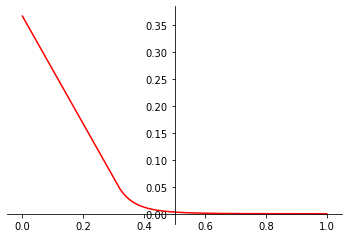

In [3]:
## PLOTING TO VERIFY
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0,1,10000)
# print(x)
y = []

for i in x:
    y = np.append(y, slippage(Decimal(i)))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [11]:
## DEPOSIT FEE FUNCTION
# (Li + Di) * g(cov_after) - Li * g(cov_before)
def depositFee(ri, Ai, Li, Di):
    # if cov > 1
    if (ri > 1):
        return (Li + Di) * slippage((Ai + Di) / (Li + Di)) - Li * slippage(ri)
    else:
        return 0


In [61]:
# Test deposit fee
# Fix coverage ratio to 1.5 = 3/2
ri = Decimal(3) / Decimal (2)
Ai = ri * Li
Li = Decimal(1000)

# User deposits 100
Di = Decimal(100)

deposit_fee = depositFee(ri, Ai, Li, Di)

print(deposit_fee)


0.001418054765716338190358689118
